In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('cleaned_jobs_data.csv')


job_role
Data Engineer                1065
Statistician                  994
Data Scientist                993
Data Analyst                  984
Machine Learning Engineer     964
Name: count, dtype: int64


job_role
Data Engineer                21.30
Statistician                 19.88
Data Scientist               19.86
Data Analyst                 19.68
Machine Learning Engineer    19.28
Name: count, dtype: float64

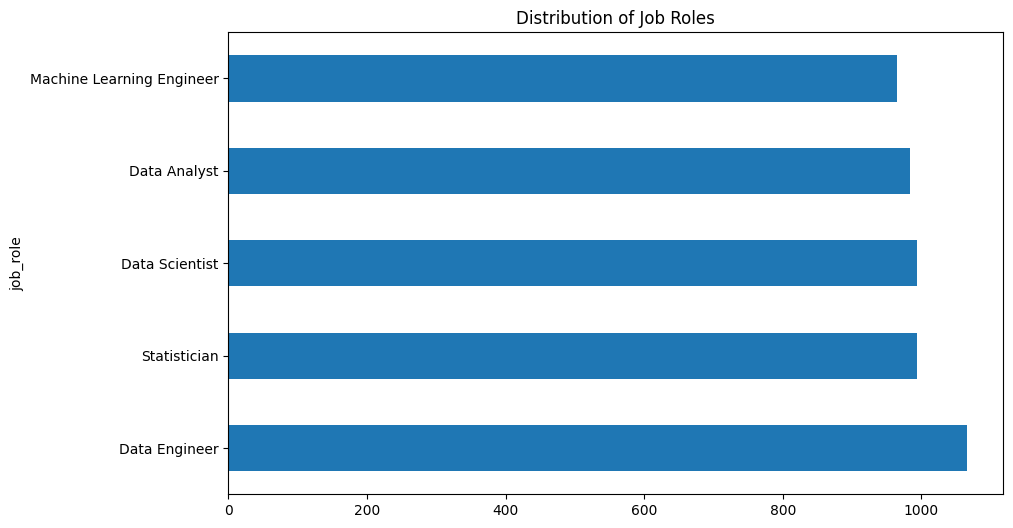

In [ ]:
df['job_role'].value_counts().plot(kind='barh', figsize=(10,6))
plt.title('Distribution of Job Roles')
num_of_roles = df['job_role'].value_counts()
print(num_of_roles)
role_percent = (num_of_roles/num_of_roles.sum()) * 100
role_percent
# Most common job role is Data Engineer with 1065 listings, followed by Statistician with 994 listings.

In [ ]:
# no. of job postings per year.
df['work_year'].value_counts()

# the dataset has details about 3 years: 2020, 2021 and 2022. The highest no. of job postigs were in 2020 with 1738 listings.

work_year
2020    1738
2021    1640
2022    1622
Name: count, dtype: int64

job_category
Data Science    1372
ML/AI           1266
Analysis        1194
Engineering     1168
Name: count, dtype: int64


job_category
Data Science    27.44
ML/AI           25.32
Analysis        23.88
Engineering     23.36
Name: count, dtype: float64

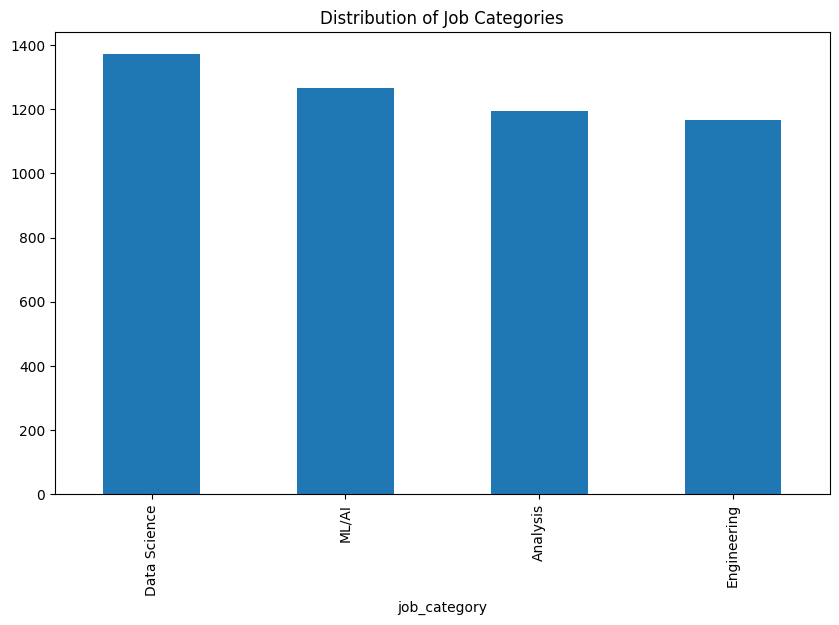

In [22]:
df['job_category'].value_counts().plot(kind='bar', figsize=(10,6))
plt.title('Distribution of Job Categories')
num_of_categories = df['job_category'].value_counts()
print(num_of_categories)
percentage = (num_of_categories/num_of_categories.sum()) * 100
percentage
# Most common job category is Data Science with 1372 listings, followed by ML/AI with 1266 listings.

Text(0.5, 1.0, 'Salary Distribution per job category')

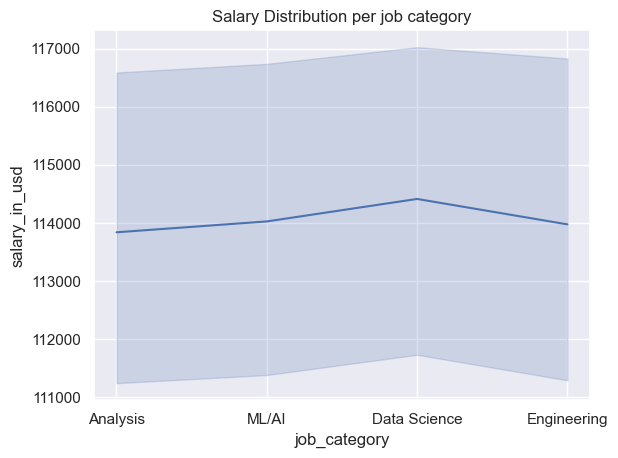

In [43]:
sns.set_style("darkgrid")
sns.lineplot(x='job_category', y='salary_in_usd', data = df)
plt.title('Salary Distribution per job category')

# Data science has the highest median salary, followed by ML/AI and Data Engineering.

experience_level
Entry-Level    117373.0
Senior         113643.5
Mid-Level      112872.5
Executive      111585.0
Name: salary_in_usd, dtype: float64

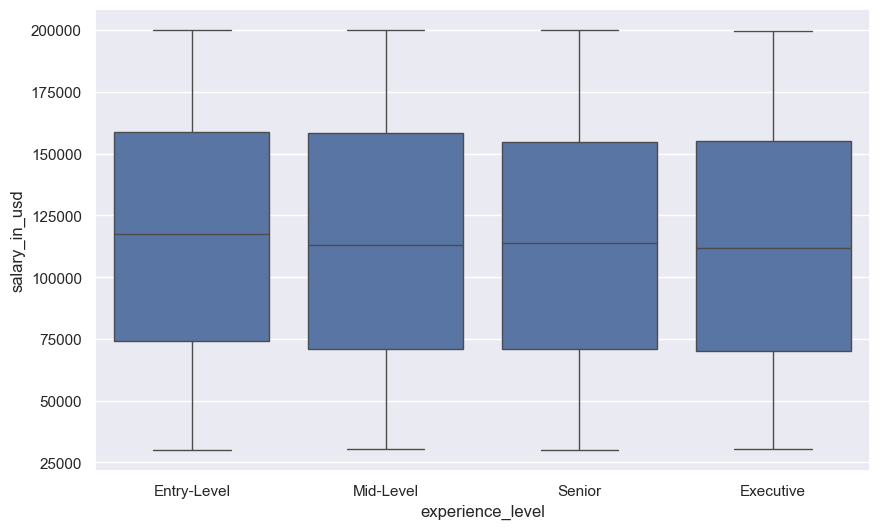

In [ ]:
order = ['Entry-Level', 'Mid-Level', 'Senior', 'Executive']
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='experience_level',
    y='salary_in_usd',
    data=df,
    order=order
)
df.groupby('experience_level')['salary_in_usd'].median().sort_values(ascending=False)

# Entry level positions have the highest median salary, followed by Senior level, midlevel and executive level positions.
# This could be because entry level positions are often in high demand and companies may offer higher salaries to attract top talent.
# entry level positions may also require specialized skills or knowledge that command higher salaries.

Text(0.5, 1.0, 'Salary Distribution')

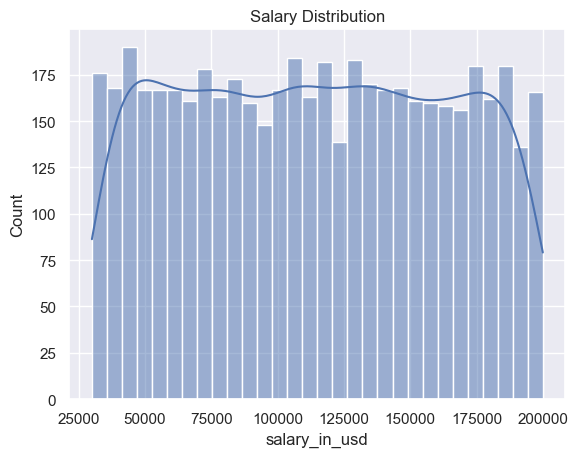

In [ ]:
sns.histplot(df['salary_in_usd'], bins=30, kde=True)
plt.title('Salary Distribution')

# The salary distribution shows very little skewness and appears approximately symmetric,
# indicating that salaries are fairly evenly distributed across the given range

company_location
Japan             117332.0
United States     116771.0
Mexico            116613.0
India             114130.5
United Kingdom    111690.0
Germany           111611.5
China             109608.0
Name: salary_in_usd, dtype: float64


<Axes: xlabel='company_location', ylabel='salary_in_usd'>

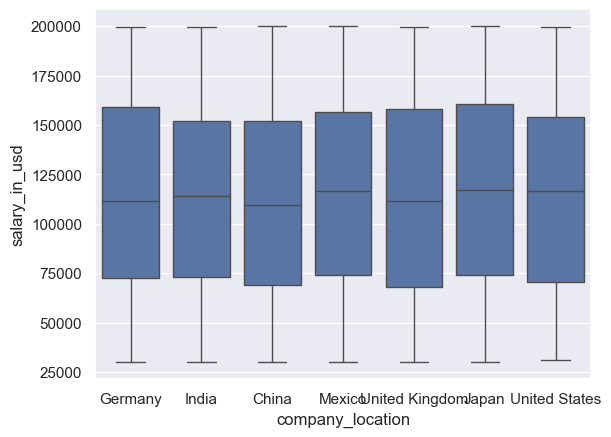

In [76]:
print(df.groupby('company_location')['salary_in_usd'].median().sort_values(ascending=False))
# Japan has the highest median salary, followed by United States and Mexico. Lowest median salary is in China.
sns.boxplot(x='company_location', y='salary_in_usd', data=df)

In [ ]:
# median vs mean salary analysis
median_salary = df['salary_in_usd'].median()
mean_salary = df['salary_in_usd'].mean()
print(f'Median Salary: {median_salary}')
print(f'Mean Salary: {mean_salary}')

Median Salary: 114167.0
Mean Salary: 114076.9958


employment_type
Freelance    116136.0
Part-Time    115885.5
Contract     113924.0
Full-Time    109486.0
Name: salary_in_usd, dtype: float64


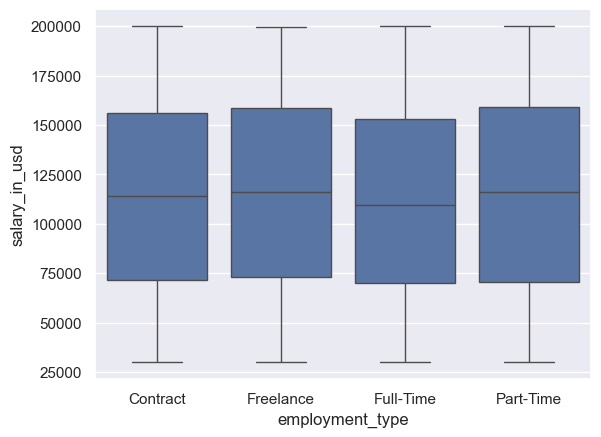

In [85]:
# employment type vs salary analysis
sns.boxplot(x='employment_type', y='salary_in_usd', data=df)
emp_type_median = df.groupby('employment_type')['salary_in_usd'].median().sort_values(ascending=False)
print(emp_type_median)

# Freelance positions have the highest median salary, followed by part-time and Contract. Full-time positions have the lowest median salary.


In [ ]:
# work setting vs company location analysis
work_setting_median = df.groupby(['work_setting'])['salary_in_usd'].median().sort_values(ascending=False)
work_setting_median

# In person work setting has the highest median salary, followed by hybrid and remote work settings.
# this could be because in-person roles may require employees to be physically present at the workplace, which can involve additional costs such as commuting expenses and relocation costs.

work_setting
In-person    114975.0
Hybrid       114943.0
Remote       112424.0
Name: salary_in_usd, dtype: float64

In [ ]:
salary_range = df.groupby('job_role')['salary_in_usd'].agg(min_salary='min', max_salary='max')
salary_range['salary_range'] = salary_range['max_salary'] - salary_range['min_salary']

salary_range = salary_range.reset_index()
salary_range.sort_values(by='salary_range', ascending=False)

# Widest salary range is seen in the role of Data Scientist, followed by Data Engineer. 
# Lowest salary range is seen in the role of Machine Learning Engineer.

# also the highest max salary is seen in the role of Data Scientist followed by Data Engineer 

,job_role,min_salary,max_salary,salary_range
2,Data Scientist,30016,199985,169969
1,Data Engineer,30178,199964,169786
4,Statistician,30056,199790,169734
0,Data Analyst,30348,199894,169546
3,Machine Learning Engineer,30209,199734,169525


In [109]:
# job category vs salary analysis
median_data = df.groupby('job_category')['salary_in_usd'].median().sort_values(ascending=False)
# ML/AI job roles pay higher median salaries, followed by Data Science and Data Engineering roles. Analysis roles pay the lowest salaries.

In [ ]:
# Are some roles underpaid despite high demand?
demand = df['job_role'].value_counts()
demand_pct = ((demand)/(demand.sum()))*100
print(demand_pct)   # highest demand is for data engineers, followed by statisticians.

avg_salary = df.groupby('job_role')['salary_in_usd'].mean()

role_analysis = pd.concat([demand_pct, avg_salary], axis=1)
role_analysis.columns = ['demand_pct', 'avg_salary']

role_analysis.sort_values(by=['demand_pct', 'avg_salary'], ascending=[False, True])

# this shows that despite the high demand for data engineers, their average salary is lower compared to all other roles!
# Statisticians have the second highest demand and also have a higher average salary than data engineers.
# This could indicate that data engineers are underpaid relative to their demand in the job market.

job_role
Data Engineer                21.30
Statistician                 19.88
Data Scientist               19.86
Data Analyst                 19.68
Machine Learning Engineer    19.28
Name: count, dtype: float64


,demand_pct,avg_salary
job_role,,
Data Engineer,21.30,113264.465728
Statistician,19.88,116039.247485
Data Scientist,19.86,113698.371601
Data Analyst,19.68,113921.636179
Machine Learning Engineer,19.28,113499.935685


In [128]:
# Are freelance roles more common at senior levels?

freelance_senior_count = df[(df['employment_type']=='Freelance') & (df['experience_level'] == 'Senior')]
freelance_senior_count = freelance_senior_count.shape[0]
print("Freelancing seniors: ",freelance_senior_count)
total_seniors = df[df['experience_level'] == 'Senior']
total_seniors = total_seniors.shape[0]
print("Total number of seniors: ", total_seniors)
freelancing_pct = (freelance_senior_count/total_seniors)*100
freelancing_pct

# freelancing seniors percentage is approx 26% which means approx 1/4 th of the senior level candidates are freelancing.
# whereas most of the part (3/4 th) arent freelancing, which means freelance roles arent common at senior levels.

Freelancing seniors:  336
Total number of seniors:  1294


25.965996908809892

In [ ]:
freelance_count = df[df['employment_type'] == 'Freelance'].groupby('experience_level').size()
freelance_count
total_count = df.groupby('experience_level').size()
freelancing_pct = (freelance_count/total_count) * 100

freelancing_summary = pd.DataFrame({
    'freelance_count': freelance_count,
    'total_count': total_count,
    'freelancing_pct': freelancing_pct
}).fillna(0)

freelancing_summary.sort_values('freelancing_pct', ascending=False)

# all the levels have freelancing percentage of approx 25-26 meaning freelance roles arent much common at any experience level.
# Executive level has the highest freelancing percentage of 25.97%, followed by Senior level with 25.96%.
# mid level has the lowest freelancing percentage of 24.022%.

# Market structure encourages freelancing uniformly across experience levels. No significant bias towards any level.


,freelance_count,total_count,freelancing_pct
experience_level,,,
Executive,320,1232,25.974026
Senior,336,1294,25.965997
Entry-Level,312,1246,25.040128
Mid-Level,295,1228,24.022801


In [ ]:
# freelancing didnt depend on experience level, now checking if it depends on job role.
freelance_countt = df[df['employment_type'] == 'Freelance'].groupby('job_role').size()
freelance_countt
total_countt = df.groupby('job_role').size()
freelancing_pctt = (freelance_countt/total_countt) * 100

freelancing_summaryy = pd.DataFrame({
    'freelance_count': freelance_countt,
    'total_count': total_countt,
    'freelancing_pctt': freelancing_pctt
}).fillna(0)

freelancing_summaryy.sort_values('freelancing_pctt', ascending=False)

# here too the differences are very small, but slightly better than experience level analysis.
# statisticians have the highest freelancing percentage of 27.06%, followed by Data Scientists with 26.38%.
# Data engineers have the lowest freelancing percentage of 24.03%.

# Overall, freelancing seems to be uniformly encouraged across job roles as well. With statisticians and data scientists
# slightly more inclined towards freelancing.

,freelance_count,total_count,freelancing_pctt
job_role,,,
Statistician,269,994,27.062374
Data Scientist,262,993,26.384693
Data Analyst,244,984,24.796748
Machine Learning Engineer,232,964,24.066390
Data Engineer,256,1065,24.037559


In [ ]:
# Which work setting dominates the job market?
df['work_setting'].value_counts()

# Hybrid work setting is the most common, followed by in person. remote->least

work_setting
Hybrid       1721
In-person    1658
Remote       1621
Name: count, dtype: int64

In [ ]:
# Do large companies pay more than small companies?

company_size_sal = df.groupby('company_size')['salary_in_usd'].mean().sort_values(ascending=False)
print(company_size_sal)

# large companies pay higher than small and medium sized companies, followed by small sized companies.
# medium size companies pay the least

# small companies paying more than medium sized may be because they want to grow more so need to attract people.

company_size
Large     114748.102016
Small     113780.014184
Medium    113720.258528
Name: salary_in_usd, dtype: float64


In [ ]:
# do small sized companies offer more entry level roles?

comp_exp = df[df['experience_level'] == 'Entry-Level']['company_size'].value_counts()
comp_exp

# no, medium sized companies offer the most entry level roles, followed by small sized companies.

company_size
Medium    442
Small     411
Large     393
Name: count, dtype: int64

In [152]:
# counts of experience levels per company size
counts = df.groupby(['company_size', 'experience_level']).size().unstack()
print(counts)

# most common experience level for each company size
most_common = counts.idxmax(axis=1)
print("\nMost common experience level per company size:")
print(most_common)

experience_level  Entry-Level  Executive  Mid-Level  Senior
company_size                                               
Large                     393        423        391     430
Medium                    442        381        423     425
Small                     411        428        414     439

Most common experience level per company size:
company_size
Large          Senior
Medium    Entry-Level
Small          Senior
dtype: object


In [ ]:
# Which countries have the highest number of jobs for a particular role?
c = df.groupby(['company_location', 'job_role']).size().unstack().fillna(0)
highest = c.idxmax(axis=1)
highest
 
# data scientists--> US, India
# data engineers --> UK, China, Germany,Japan
# ML engg-->Mexico

company_location
China                         Data Engineer
Germany                       Data Engineer
India                        Data Scientist
Japan                         Data Engineer
Mexico            Machine Learning Engineer
United Kingdom                Data Engineer
United States                Data Scientist
dtype: object

In [ ]:
# Are high-paying countries also high-volume markets?

high_pay_c = df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False)
print(high_pay_c)
# Japan, Mexico have highest mean salaries, whereas UK and china have the lowest.
market_volume = df['company_location'].value_counts()
print(market_volume)
pd.concat([high_pay_c, market_volume], axis=1, keys=['mean_salary', 'job_count']).sort_values(by=['mean_salary', 'job_count'], ascending=[False, True])


# No clear correlation between high-paying countries and high-volume markets.

company_location
Japan             116266.269400
Mexico            115175.966339
Germany           113979.698347
United States     113859.799708
India             113700.105932
United Kingdom    113129.910013
China             112576.922525
Name: salary_in_usd, dtype: float64
company_location
United Kingdom    789
Germany           726
Mexico            713
India             708
China             697
United States     684
Japan             683
Name: count, dtype: int64


,mean_salary,job_count
company_location,,
Japan,116266.269400,683
Mexico,115175.966339,713
Germany,113979.698347,726
United States,113859.799708,684
India,113700.105932,708
United Kingdom,113129.910013,789
China,112576.922525,697


In [ ]:
# Does remote work reduce salary?
remote_salary = df[df['work_setting'] == 'Remote']['salary_in_usd'].mean()
non_remote_salary = df[df['work_setting'] != 'Remote']['salary_in_usd'].mean()
print(f'Remote Work Mean Salary: {remote_salary}')
print(f'Non-Remote Work Mean Salary: {non_remote_salary}')

# Remote work mean salary is lower than non-remote work mean salary.

Remote Work Mean Salary: 113053.13695249846
Non-Remote Work Mean Salary: 114568.16928085232


<Axes: xlabel='employment_type', ylabel='salary_in_usd'>

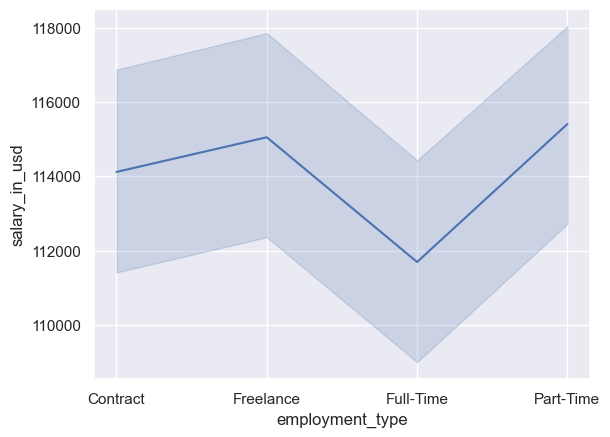

In [ ]:
sns.lineplot(x='employment_type', y='salary_in_usd', data=df)

# freelancers have the highest salary, followed by part-time and contract workers. 
# Full-time employees have the lowest salary on average.